In [7]:
# --- Imports ---
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# --- Settings ---
sns.set(style="whitegrid")

# --- Load Data ---
data = pd.read_csv("synthetic_customer_data.csv")
data.head()




,customer_id,age,gender,tenure_months,monthly_usage_minutes,signup_date,is_churned,monthly_revenue,campaign_group,converted
0,1,56,Male,21,588,2022-01-01 00:00:00.000000000,0,42.58,treatment,1
1,2,69,Female,5,411,2022-01-01 08:23:31.905952976,0,18.01,treatment,1
2,3,46,Female,16,382,2022-01-01 16:47:03.811905952,0,31.83,treatment,0
3,4,32,Male,20,460,2022-01-02 01:10:35.717858929,0,25.08,control,0
4,5,60,Female,5,378,2022-01-02 09:34:07.623811905,0,30.50,treatment,0


In [25]:

# --- Basic Overview ---
print(data['campaign_group'].value_counts())
print("\nChurn rate by group:")
print(data.groupby('campaign_group')['is_churned'].mean())

print("\nNumber of converted by group:")
print(data.groupby('campaign_group')['converted'].sum())


campaign_group
control      1003
treatment     997
Name: count, dtype: int64

Churn rate by group:
campaign_group
control      0.155533
treatment    0.147442
Name: is_churned, dtype: float64

Number of converted by group:
campaign_group
control      198
treatment    375
Name: converted, dtype: int64


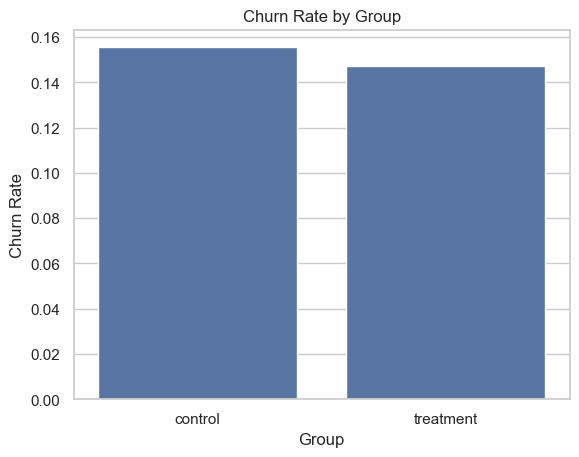

In [14]:
# --- Visualize Churn Rates ---
churn_rates = data.groupby("campaign_group")["is_churned"].mean().reset_index()
sns.barplot(x="campaign_group", y="is_churned", data=churn_rates)
plt.title("Churn Rate by Group")
plt.ylabel("Churn Rate")
plt.xlabel("Group")
plt.show()


In [16]:
from statsmodels.stats.proportion import proportions_ztest

# Count of churned customers in each group (successes)
successes = [
    data[data["campaign_group"] == "control"]["is_churned"].sum(),
    data[data["campaign_group"] == "treatment"]["is_churned"].sum()
]

# Sample sizes for each group
n_obs = [
    data[data["campaign_group"] == "control"].shape[0],
    data[data["campaign_group"] == "treatment"].shape[0]
]

# Perform the two-proportion z-test
z_stat, p_val = proportions_ztest(count=successes, nobs=n_obs)

# Output results
print(f"Z-statistic: {z_stat:.3f}")
print(f"P-value: {p_val:.4f}")
if p_val < 0.05:
    print("✅ Statistically significant difference in churn rates.")
else:
    print("⚠️ No statistically significant difference in churn rates.")

Z-statistic: 0.505
P-value: 0.6138
⚠️ No statistically significant difference in churn rates.


In [27]:
#Analysis of Conversion Impact
conversion_rates = data.groupby("campaign_group")["converted"].mean().reset_index()
conversion_rates

,campaign_group,converted
0,control,0.197408
1,treatment,0.376128


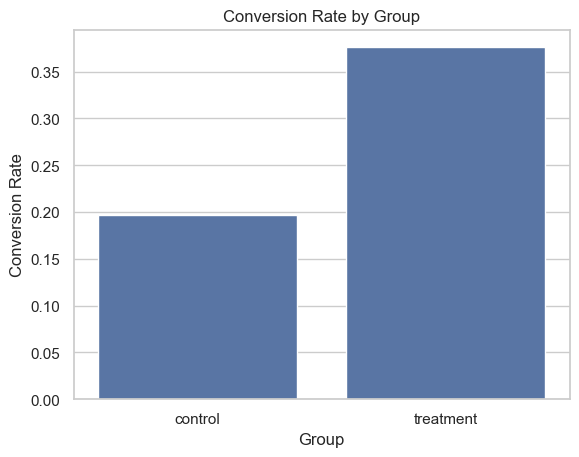

In [28]:
sns.barplot(x="campaign_group", y="converted", data=conversion_rates)
plt.title("Conversion Rate by Group")
plt.ylabel("Conversion Rate")
plt.xlabel("Group")
plt.show()

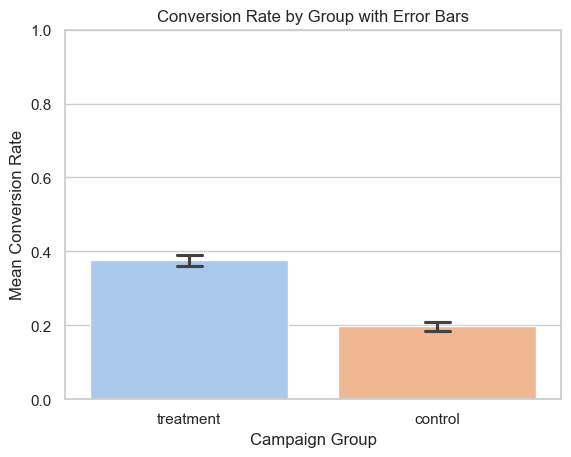

In [23]:
sns.barplot(
    data=data,
    x="campaign_group",
    y="converted",
    hue="campaign_group",         
    estimator=np.mean,
    errorbar="se",
    capsize=0.1,
    palette="pastel",
    legend=False                
)

plt.title("Conversion Rate by Group with Error Bars")
plt.ylabel("Mean Conversion Rate")
plt.xlabel("Campaign Group")
plt.ylim(0, 1)
plt.show()